## Unsupervised ML Python Homework

In [2]:
import numpy as np
import pandas as pd
import sklearn
import sys
import warnings
import os
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" 

import matplotlib.pyplot as plt
import seaborn as sns
import time


from sklearn.decomposition import PCA

import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [3]:
data = pd.read_csv('unsupervised_ml_homework_data.csv')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.737848,-1.646325,-7.810163,11.995504,-2.807248,-0.085124,2.255992,1.746520,-9.256078,1.693435,-19.772970,9.750907,4.551802,-7.251561,5.099425,2.270202,-8.097061,-6.058829,-3.268958,2.623776
1,-6.024396,-0.488319,4.315504,0.650888,-14.594512,-2.801084,10.649474,6.087658,10.845574,5.494591,10.725055,2.933646,-12.785655,-9.768811,-14.827223,-6.423245,8.097094,1.899088,0.376761,-3.531153
2,0.490949,-10.487436,-9.045535,0.129481,3.977727,-7.615191,-12.787071,6.416582,11.013078,-5.251267,-5.692146,0.834205,3.299760,3.082884,-5.425403,6.274120,-11.407726,-5.886591,3.365510,23.723555
3,-13.087377,7.845202,21.154323,7.971816,-13.379182,1.204298,5.592174,-3.450956,6.537270,5.360073,5.689761,3.148839,3.416195,-16.175695,1.531479,5.373013,1.643889,1.227602,3.878080,12.262810
4,-7.171991,13.705993,11.057470,14.073451,-7.947617,-4.637308,6.351615,-6.814010,-2.483272,4.279979,9.275197,-18.018556,-3.428444,-5.252267,-6.693149,-4.172268,6.079671,7.918299,5.047994,4.019611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.471686,12.940466,8.508031,19.479180,-3.637595,3.513321,12.118536,0.347570,5.111509,-3.054912,5.697629,7.516148,-10.959986,-8.098598,-5.641822,2.220350,12.026172,5.860314,3.439185,-0.963639
996,-7.518274,6.128470,11.750514,3.632682,-17.542199,-1.025005,10.457185,-5.062221,6.447733,1.171539,-2.275978,8.270251,-15.710402,-12.621179,-15.950729,-9.878082,12.856359,0.787886,3.381137,0.173625
997,8.765803,-10.063699,-2.102178,8.809839,-3.357467,-5.563186,1.583849,-0.648160,7.130244,-5.364986,-12.926855,-2.191091,18.516239,3.508759,-3.534441,8.934743,-15.085670,5.897779,-3.473376,8.841673
998,-0.688375,-2.251089,-16.099880,-5.961233,-2.604041,-12.876690,-23.101496,-4.899372,13.612339,-15.022254,-8.881761,-13.294057,11.791521,5.684052,-12.296774,-10.716805,-4.355119,-9.737902,12.584078,14.301682


### Soal 1: PCA

Instruksi:
1. Lakukan PCA pada data yang telah di-import di cell atas.
2. Ketentuan PCA: Ambil sampai threshold explained variancenya 0.8 (80%)
3. Berapa Principal Components yang diambil?
4. Simpan data hasil PCA karena data hasil PCA ini akan digunakan di Soal 2: K-Means

In [10]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,3.737848,-1.646325,-7.810163,11.995504,-2.807248,-0.085124,2.255992,1.746520,-9.256078,1.693435,-19.772970,9.750907,4.551802,-7.251561,5.099425,2.270202,-8.097061,-6.058829,-3.268958,2.623776
1,-6.024396,-0.488319,4.315504,0.650888,-14.594512,-2.801084,10.649474,6.087658,10.845574,5.494591,10.725055,2.933646,-12.785655,-9.768811,-14.827223,-6.423245,8.097094,1.899088,0.376761,-3.531153
2,0.490949,-10.487436,-9.045535,0.129481,3.977727,-7.615191,-12.787071,6.416582,11.013078,-5.251267,-5.692146,0.834205,3.299760,3.082884,-5.425403,6.274120,-11.407726,-5.886591,3.365510,23.723555
3,-13.087377,7.845202,21.154323,7.971816,-13.379182,1.204298,5.592174,-3.450956,6.537270,5.360073,5.689761,3.148839,3.416195,-16.175695,1.531479,5.373013,1.643889,1.227602,3.878080,12.262810
4,-7.171991,13.705993,11.057470,14.073451,-7.947617,-4.637308,6.351615,-6.814010,-2.483272,4.279979,9.275197,-18.018556,-3.428444,-5.252267,-6.693149,-4.172268,6.079671,7.918299,5.047994,4.019611


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   float64
 11  11      1000 non-null   float64
 12  12      1000 non-null   float64
 13  13      1000 non-null   float64
 14  14      1000 non-null   float64
 15  15      1000 non-null   float64
 16  16      1000 non-null   float64
 17  17      1000 non-null   float64
 18  18      1000 non-null   float64
 19  19      1000 non-null   float64
dtypes: float64(20)
memory usage: 156.4 KB


In [40]:
x = data.iloc[:,:19]
y = data.iloc[:,-1]
x

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3.737848,-1.646325,-7.810163,11.995504,-2.807248,-0.085124,2.255992,1.746520,-9.256078,1.693435,-19.772970,9.750907,4.551802,-7.251561,5.099425,2.270202,-8.097061,-6.058829,-3.268958
1,-6.024396,-0.488319,4.315504,0.650888,-14.594512,-2.801084,10.649474,6.087658,10.845574,5.494591,10.725055,2.933646,-12.785655,-9.768811,-14.827223,-6.423245,8.097094,1.899088,0.376761
2,0.490949,-10.487436,-9.045535,0.129481,3.977727,-7.615191,-12.787071,6.416582,11.013078,-5.251267,-5.692146,0.834205,3.299760,3.082884,-5.425403,6.274120,-11.407726,-5.886591,3.365510
3,-13.087377,7.845202,21.154323,7.971816,-13.379182,1.204298,5.592174,-3.450956,6.537270,5.360073,5.689761,3.148839,3.416195,-16.175695,1.531479,5.373013,1.643889,1.227602,3.878080
4,-7.171991,13.705993,11.057470,14.073451,-7.947617,-4.637308,6.351615,-6.814010,-2.483272,4.279979,9.275197,-18.018556,-3.428444,-5.252267,-6.693149,-4.172268,6.079671,7.918299,5.047994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-3.471686,12.940466,8.508031,19.479180,-3.637595,3.513321,12.118536,0.347570,5.111509,-3.054912,5.697629,7.516148,-10.959986,-8.098598,-5.641822,2.220350,12.026172,5.860314,3.439185
996,-7.518274,6.128470,11.750514,3.632682,-17.542199,-1.025005,10.457185,-5.062221,6.447733,1.171539,-2.275978,8.270251,-15.710402,-12.621179,-15.950729,-9.878082,12.856359,0.787886,3.381137
997,8.765803,-10.063699,-2.102178,8.809839,-3.357467,-5.563186,1.583849,-0.648160,7.130244,-5.364986,-12.926855,-2.191091,18.516239,3.508759,-3.534441,8.934743,-15.085670,5.897779,-3.473376
998,-0.688375,-2.251089,-16.099880,-5.961233,-2.604041,-12.876690,-23.101496,-4.899372,13.612339,-15.022254,-8.881761,-13.294057,11.791521,5.684052,-12.296774,-10.716805,-4.355119,-9.737902,12.584078


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=1)

In [70]:
x_train.shape

(850, 19)

In [71]:
x_test.shape

(150, 19)

In [72]:
from sklearn.preprocessing import StandardScaler
Ss = StandardScaler()

# transform data
x_train_scaled = Ss.fit_transform(x_train)
x_test_scaled = Ss.fit_transform(x_test)

**Ketentuan PCA: Ambil sampai threshold explained variancenya 0.8 (80%)**

In [49]:
pca_80 = PCA(0.80)

In [89]:
start_time = time.time()
pca_80.fit(x_train_scaled)
x_pca_80 = pca_80.transform(x_scaled)
finish_time = time.time()

print('PCA Fit and Transform finished in', finish_time - start_time, 'seconds.')
print('Hanya tersisa:', pca_80.n_components_, 'feature columns setelah dlakukan PCA.')
print('Dataset berhasil direduksi oleh PCA sebanyak', (1-(pca_80.n_components_/19))*100, 'persen')

PCA Fit and Transform finished in 0.002002239227294922 seconds.
Hanya tersisa: 11 feature columns setelah dlakukan PCA.
Dataset berhasil direduksi oleh PCA sebanyak 42.10526315789473 persen


Berapa Principal Components yang diambil?

In [90]:
print('Principal Compenents yang diambil adalah:', pca_80.n_components_)

Principal Compenents yang diambil adalah: 11


Perbandingan sebelum dan sesudah dilakukan PCA

In [93]:
print('Sebelum PCA', data.shape)
print('Sesudah PCA', x_pca_80.shape)

Sebelum PCA (1000, 20)
Sesudah PCA (1000, 11)


##### Jawab: Hasil PCA adalah mengambil ?? Principal Components. (isi ?? dengan angka)

### Soal 2: K Means

Instruksi:
1. Dari data yang sudah di-PCA-kan (jadi datanya sudah baru ya, bukan data original lagi, ingat, data yang sudah di-PCA-kan), kita akan menentukan k = ?? yang paling ideal untuk clustering.
2. Lakukan Elbow dan Silhouette method
3. Visualisasikan hasil Elbow dan Silhouette method
4. Berapa nilai k yang terbaik? 

In [94]:
# Elbow Method
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster)
    kmeans.fit(x_pca_80)
    score.append(kmeans.inertia_)

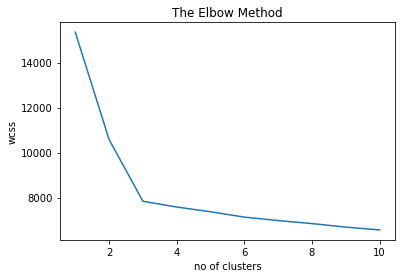

In [95]:
# plotting the score

plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

'Elbow' terjadi di k = 2 dan k = 3

In [3]:
# Silhouette score

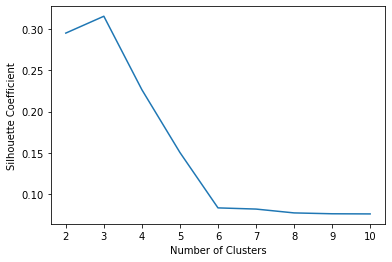

In [97]:
silhouette_coefficients = []
from sklearn.metrics import silhouette_score

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_pca_80)
    score = silhouette_score(x_pca_80, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Nilai Silhouette tertinggi ada di k = 3 

Berarti, dapat berasumsi bahwa k = 3 menjadi 'k' yang paling ideal dalam k-Means ini.

##### Jawab: Nilai k yang terbaik berdasarkan Elbow dan Silhouette method adalah...k = ??

In [104]:
kmeans_final = KMeans(n_clusters = 3)
data['cluster'] = kmeans_final.fit_predict(x_pca_80)
data['cluster'] = data['cluster'].astype('category')

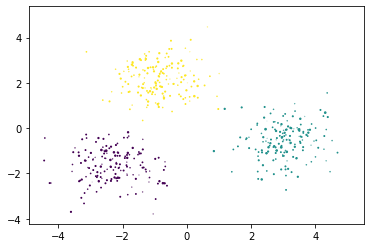

In [120]:
kmeans_final = KMeans(n_clusters = 3, random_state = 5)
y_kmeans = kmeans_final.fit_predict(x_pca_80)

plt.scatter(x_pca_80[:, 0], x_pca_80[:, 1], x_pca_80[:, 2], c=y_kmeans)